In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [64]:
# Sizes of the data sets.
sizes = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000]
capacity = 10
ntrials = 10
base_dir = os.getcwd()
exec_dir = "../.."
output_file = '{}/test_construction.csv'.format(base_dir)

In [65]:
# Test the implementation.

f = open(output_file, 'w')

os.chdir(exec_dir)

for m in sizes:
    print('Testing m={}...'.format(m))
    input_file = "{}/records_{}_0_1000.bin".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["java", "TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[2].split(' '))[2])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

Testing m=100...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_100_0_1000.bin
25650172.0
Testing m=250...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_250_0_1000.bin
27782464.7
Testing m=500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_500_0_1000.bin
29944861.5
Testing m=750...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_750_0_1000.bin
32315536.9
Testing m=1000...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_1000_0_1000.bin
34042296.4
Testing m=2500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_2500_0_1000.bin
47340391.3
Testing m=5000...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_5000_0_1000.bin
65487411.7
Testing m=7500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_7500_0_1000.bin
83413209.0
Testing 

In [66]:
df1 = pd.read_csv('test_construction.csv', header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000000
df1

,m,time
0,100,25.650172
1,250,27.782465
2,500,29.944861
3,750,32.315537
4,1000,34.042296
5,2500,47.340391
6,5000,65.487412
7,7500,83.413209
8,10000,93.001035
9,25000,145.571767


In [67]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
      m &        time \\
\midrule
    100 &   25.650172 \\
    250 &   27.782465 \\
    500 &   29.944861 \\
    750 &   32.315537 \\
   1000 &   34.042296 \\
   2500 &   47.340391 \\
   5000 &   65.487412 \\
   7500 &   83.413209 \\
  10000 &   93.001035 \\
  25000 &  145.571767 \\
  50000 &  184.146731 \\
  75000 &  214.876577 \\
 100000 &  257.274646 \\
\bottomrule
\end{tabular}



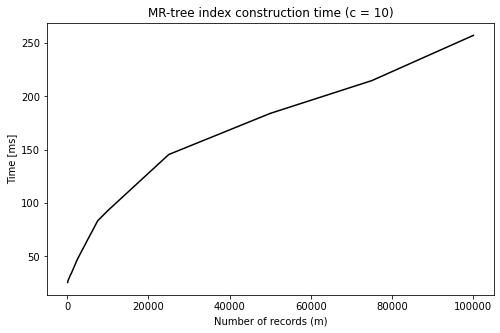

In [69]:
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (c = 10)")
#plt.plot(res['n'], res['mat_time'], color='gray', label='Matlab')
plt.plot(df1['m'], df1['time'], color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
#plt.plot([x for x in range(100, 100000)], [x*np.log(x) for x in range(100, 100000)], color='black', linestyle='--')
#plt.legend()
plt.savefig("test_construction.png", dpi=170, format='png', bbox_inches='tight')

In [41]:
#res.to_csv('test_n_full.csv', header=True, index=False)